Data preproccessing

In [ ]:
import numpy as np  
import pandas as pd  
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
import os
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/all_month (1).csv')
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-27T03:52:15.750Z,36.974998,-121.046166,7.590000,1.96,md,27.0,105.0,0.0545,0.16,...,2022-12-27T04:26:11.533Z,"20km WSW of Los Banos, CA",earthquake,0.52,1.000,0.170,25.0,automatic,nc,nc
1,2022-12-27T03:46:18.370Z,-25.358900,-174.903900,10.000000,5.00,mb,21.0,133.0,4.1790,0.70,...,2022-12-27T04:05:32.040Z,south of Tonga,earthquake,6.69,1.925,0.141,16.0,reviewed,us,us
2,2022-12-27T03:41:21.178Z,60.304500,-151.181200,42.400000,2.00,ml,NaN,NaN,NaN,0.53,...,2022-12-27T03:43:30.916Z,"6 km SE of Kasilof, Alaska",earthquake,NaN,2.000,NaN,NaN,automatic,ak,ak
3,2022-12-27T03:37:17.626Z,60.097900,-152.827800,112.800000,2.30,ml,NaN,NaN,NaN,0.37,...,2022-12-27T03:39:23.482Z,"63 km WNW of Happy Valley, Alaska",earthquake,NaN,0.700,NaN,NaN,automatic,ak,ak
4,2022-12-27T03:30:11.993Z,37.948100,101.145900,10.000000,4.70,mb,49.0,48.0,10.6010,0.64,...,2022-12-27T03:57:38.040Z,"110 km SW of Jinchang, China",earthquake,10.15,1.939,0.079,48.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10571,2022-11-27T04:50:31.655Z,58.654700,-154.285300,10.700000,1.60,ml,NaN,NaN,NaN,0.74,...,2022-12-15T01:43:46.177Z,"91 km SSE of Kokhanok, Alaska",earthquake,NaN,0.200,NaN,NaN,reviewed,ak,ak
10572,2022-11-27T04:44:12.435Z,-31.098400,-178.797600,10.000000,5.00,mb,46.0,69.0,1.9820,0.92,...,2022-12-24T00:51:13.040Z,Kermadec Islands region,earthquake,9.44,1.818,0.084,47.0,reviewed,us,us
10573,2022-11-27T04:43:26.582Z,9.361600,126.378000,56.023000,5.00,mb,91.0,37.0,2.4110,0.76,...,2022-12-24T00:19:26.107Z,"22 km ENE of Cortes, Philippines",earthquake,8.28,6.102,0.044,165.0,reviewed,us,us
10574,2022-11-27T04:42:27.371Z,61.836600,-149.519800,44.800000,1.30,ml,NaN,NaN,NaN,0.36,...,2022-12-12T22:21:18.648Z,"18 km NW of Fishhook, Alaska",earthquake,NaN,0.700,NaN,NaN,reviewed,ak,ak


Taking only the required part that is place lat long depth mag and place

In [ ]:
df = df[['time', 'latitude', 'longitude', 'depth', 'mag', 'place']]
df_1=df

In [ ]:
df

,time,latitude,longitude,depth,mag,place
0,2022-12-27T03:52:15.750Z,36.974998,-121.046166,7.590000,1.96,"20km WSW of Los Banos, CA"
1,2022-12-27T03:46:18.370Z,-25.358900,-174.903900,10.000000,5.00,south of Tonga
2,2022-12-27T03:41:21.178Z,60.304500,-151.181200,42.400000,2.00,"6 km SE of Kasilof, Alaska"
3,2022-12-27T03:37:17.626Z,60.097900,-152.827800,112.800000,2.30,"63 km WNW of Happy Valley, Alaska"
4,2022-12-27T03:30:11.993Z,37.948100,101.145900,10.000000,4.70,"110 km SW of Jinchang, China"
...,...,...,...,...,...,...
10571,2022-11-27T04:50:31.655Z,58.654700,-154.285300,10.700000,1.60,"91 km SSE of Kokhanok, Alaska"
10572,2022-11-27T04:44:12.435Z,-31.098400,-178.797600,10.000000,5.00,Kermadec Islands region
10573,2022-11-27T04:43:26.582Z,9.361600,126.378000,56.023000,5.00,"22 km ENE of Cortes, Philippines"
10574,2022-11-27T04:42:27.371Z,61.836600,-149.519800,44.800000,1.30,"18 km NW of Fishhook, Alaska"


In [ ]:
newdf = df['place'].str.split(', ', expand=True) #obly states
newdf

,0,1,2
0,20km WSW of Los Banos,CA,None
1,south of Tonga,None,None
2,6 km SE of Kasilof,Alaska,None
3,63 km WNW of Happy Valley,Alaska,None
4,110 km SW of Jinchang,China,None
...,...,...,...
10571,91 km SSE of Kokhanok,Alaska,None
10572,Kermadec Islands region,None,None
10573,22 km ENE of Cortes,Philippines,None
10574,18 km NW of Fishhook,Alaska,None


In [ ]:
df['place'] = newdf[1]
df2=df

<ipython-input-84-0c83933773ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['place'] = newdf[1]


In [ ]:
df


,time,latitude,longitude,depth,mag,place
0,2022-12-27T03:52:15.750Z,36.974998,-121.046166,7.590000,1.96,CA
1,2022-12-27T03:46:18.370Z,-25.358900,-174.903900,10.000000,5.00,None
2,2022-12-27T03:41:21.178Z,60.304500,-151.181200,42.400000,2.00,Alaska
3,2022-12-27T03:37:17.626Z,60.097900,-152.827800,112.800000,2.30,Alaska
4,2022-12-27T03:30:11.993Z,37.948100,101.145900,10.000000,4.70,China
...,...,...,...,...,...,...
10571,2022-11-27T04:50:31.655Z,58.654700,-154.285300,10.700000,1.60,Alaska
10572,2022-11-27T04:44:12.435Z,-31.098400,-178.797600,10.000000,5.00,None
10573,2022-11-27T04:43:26.582Z,9.361600,126.378000,56.023000,5.00,Philippines
10574,2022-11-27T04:42:27.371Z,61.836600,-149.519800,44.800000,1.30,Alaska


In [ ]:
df = df.sort_values('time', ascending=True)
df

,time,latitude,longitude,depth,mag,place
10575,2022-11-27T04:41:46.900Z,19.169001,-155.477173,31.469999,2.37,Hawaii
10574,2022-11-27T04:42:27.371Z,61.836600,-149.519800,44.800000,1.30,Alaska
10573,2022-11-27T04:43:26.582Z,9.361600,126.378000,56.023000,5.00,Philippines
10572,2022-11-27T04:44:12.435Z,-31.098400,-178.797600,10.000000,5.00,None
10571,2022-11-27T04:50:31.655Z,58.654700,-154.285300,10.700000,1.60,Alaska
...,...,...,...,...,...,...
4,2022-12-27T03:30:11.993Z,37.948100,101.145900,10.000000,4.70,China
3,2022-12-27T03:37:17.626Z,60.097900,-152.827800,112.800000,2.30,Alaska
2,2022-12-27T03:41:21.178Z,60.304500,-151.181200,42.400000,2.00,Alaska
1,2022-12-27T03:46:18.370Z,-25.358900,-174.903900,10.000000,5.00,None


In [ ]:
df['time'] = df['time'].str[0:10]
df3=df
df#splitting time to days/month/year

,time,latitude,longitude,depth,mag,place
10575,2022-11-27,19.169001,-155.477173,31.469999,2.37,Hawaii
10574,2022-11-27,61.836600,-149.519800,44.800000,1.30,Alaska
10573,2022-11-27,9.361600,126.378000,56.023000,5.00,Philippines
10572,2022-11-27,-31.098400,-178.797600,10.000000,5.00,None
10571,2022-11-27,58.654700,-154.285300,10.700000,1.60,Alaska
...,...,...,...,...,...,...
4,2022-12-27,37.948100,101.145900,10.000000,4.70,China
3,2022-12-27,60.097900,-152.827800,112.800000,2.30,Alaska
2,2022-12-27,60.304500,-151.181200,42.400000,2.00,Alaska
1,2022-12-27,-25.358900,-174.903900,10.000000,5.00,None


Taking out places as we will take in plces as final output as latitude longitude is at last places we take means of these places

In [ ]:
df_coords = df[['place', 'latitude', 'longitude']]
df_coords = df_coords.groupby(['place'], as_index=False).mean()
df_coords

,place,latitude,longitude
0,Afghanistan,36.346400,70.808343
1,Alaska,59.555644,-154.325357
2,Aleutian Islands,51.944346,-42.337504
3,Algeria,36.451200,3.116100
4,Antigua and Barbuda,17.650800,-60.952583
...,...,...,...
92,Vanuatu,-15.538331,167.827508
93,Wallis and Futuna,-16.513300,-176.979150
94,Washington,47.111054,-121.851426
95,Wyoming,44.715605,-110.728600


As you can see alaska is -154 in df_cord and -152 in df so we can grp it.

In [ ]:
#inner join the table as place being the point
df = df[['time', 'depth', 'mag', 'place']]#remove long and lat
df = pd.merge(left=df, right=df_coords, how='inner', on=['place'])
df5=df
df

,time,depth,mag,place,latitude,longitude
0,2022-11-27,31.469999,2.37,Hawaii,19.344094,-155.452834
1,2022-11-27,10.230000,1.96,Hawaii,19.344094,-155.452834
2,2022-11-27,32.610001,1.83,Hawaii,19.344094,-155.452834
3,2022-11-27,32.250000,2.14,Hawaii,19.344094,-155.452834
4,2022-11-27,28.840000,2.17,Hawaii,19.344094,-155.452834
...,...,...,...,...,...,...
9567,2022-12-22,8.587000,2.50,Ohio,41.109000,-83.444600
9568,2022-12-24,11.760000,2.52,Mississippi,34.673000,-88.514833
9569,2022-12-26,10.000000,5.50,Ethiopia,14.428300,39.910250
9570,2022-12-26,9.151000,4.60,Ethiopia,14.428300,39.910250


We are using rolling windows to take out mean of earthquake over a period of time so that we can predict it 

A common time-series model assumption is that the coefficients are constant with respect to time. Checking for instability amounts to examining whether the coefficients are time-invariant.

In [ ]:
# We will take a rolling window of size 7 as a week is a good number 7,14,21

eq_tmp = df.copy()


# loop through each zone and apply MA
eq_data = []
eq_data_last_days_out = []

for place in list(set(eq_tmp['place'])):
    temp_df = eq_tmp[eq_tmp['place'] == place].copy()
    
    temp_df['Mdep_21'] = temp_df['depth'].rolling(window=21,center=False).mean() 
    temp_df['Mdep_14'] = temp_df['depth'].rolling(window=14,center=False).mean()
    temp_df['Mdep_7'] = temp_df['depth'].rolling(window=7,center=False).mean()
    temp_df['Mmag_21'] = temp_df['mag'].rolling(window=21,center=False).mean() 
    temp_df['Mmag_14'] = temp_df['mag'].rolling(window=14,center=False).mean()
    temp_df['Mmag_7'] = temp_df['mag'].rolling(window=7,center=False).mean()
    temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'Mmag_7'].shift(-9)##donot predict last 8 days as rolling window might be wrong for 28-30
    
    #days to predict value on earth quake data this is not yet seen or witnessed by next 7 days (consider as live next 7 days period)
    
    eq_data_last_days_out.append(temp_df.tail(9))#days we didnot count so we will predict these days

    eq_data.append(temp_df)

eq_data

[            time   depth  mag                place  latitude  longitude  \
 9468  2022-12-02  18.368  4.4  Antigua and Barbuda   17.6508 -60.952583   
 9469  2022-12-02  18.258  4.5  Antigua and Barbuda   17.6508 -60.952583   
 9470  2022-12-20  25.724  4.7  Antigua and Barbuda   17.6508 -60.952583   
 9471  2022-12-20  15.148  4.8  Antigua and Barbuda   17.6508 -60.952583   
 9472  2022-12-20  10.000  5.2  Antigua and Barbuda   17.6508 -60.952583   
 9473  2022-12-20  10.000  4.4  Antigua and Barbuda   17.6508 -60.952583   
 
       Mdep_21  Mdep_14  Mdep_7  Mmag_21  Mmag_14  Mmag_7  mag_outcome  
 9468      NaN      NaN     NaN      NaN      NaN     NaN          NaN  
 9469      NaN      NaN     NaN      NaN      NaN     NaN          NaN  
 9470      NaN      NaN     NaN      NaN      NaN     NaN          NaN  
 9471      NaN      NaN     NaN      NaN      NaN     NaN          NaN  
 9472      NaN      NaN     NaN      NaN      NaN     NaN          NaN  
 9473      NaN      NaN     

In [ ]:
#eq_data.head

In [ ]:

eq_all = pd.concat(eq_data)
eq_all#convert list to dataframe

,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
9468,2022-12-02,18.368,4.40,Antigua and Barbuda,17.650800,-60.952583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,2022-12-02,18.258,4.50,Antigua and Barbuda,17.650800,-60.952583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,2022-12-20,25.724,4.70,Antigua and Barbuda,17.650800,-60.952583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9471,2022-12-20,15.148,4.80,Antigua and Barbuda,17.650800,-60.952583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9472,2022-12-20,10.000,5.20,Antigua and Barbuda,17.650800,-60.952583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,2022-12-24,11.990,1.54,Washington,47.111054,-121.851426,15.567619,18.691429,21.037143,1.174762,1.235,1.55,NaN
9551,2022-12-07,5.000,2.70,Nebraska,40.193400,-98.301100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9537,2022-12-06,10.000,4.30,Turkmenistan,38.012050,59.359900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9538,2022-12-22,10.000,4.50,Turkmenistan,38.012050,59.359900,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#rolling windows has a lot of NAN from the 1st part removing it
# remove any NaN fields
eq_all=eq_all.dropna()
eq_all

,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
7698,2022-12-05,8.00,1.20,California,40.364027,-119.718784,7.010952,6.666429,7.118571,1.209524,1.292857,1.614286,1.214286
7699,2022-12-05,0.00,0.90,California,40.364027,-119.718784,6.653810,6.130714,7.118571,1.223810,1.307143,1.500000,1.228571
7700,2022-12-05,8.80,0.50,California,40.364027,-119.718784,6.925238,6.759286,7.147143,1.209524,1.285714,1.442857,1.185714
7701,2022-12-05,8.80,1.20,California,40.364027,-119.718784,6.949048,6.745000,6.228571,1.200000,1.257143,1.200000,1.185714
7702,2022-12-05,0.50,1.80,California,40.364027,-119.718784,6.587143,6.437857,5.385714,1.228571,1.314286,1.228571,1.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7664,2022-12-21,1.01,0.26,Washington,47.111054,-121.851426,12.977143,9.235000,9.017143,0.920000,1.029286,0.994286,1.511429
7665,2022-12-21,18.92,0.79,Washington,47.111054,-121.851426,13.270476,10.187143,10.460000,0.942381,0.987143,0.868571,1.437143
7666,2022-12-22,9.20,0.60,Washington,47.111054,-121.851426,13.419048,10.392857,11.912857,0.947619,1.019286,0.764286,1.587143
7667,2022-12-22,17.25,1.17,Washington,47.111054,-121.851426,12.890952,11.027143,11.081429,0.943333,1.007143,0.705714,1.555714


In [ ]:
eq_data_last_days_out = pd.concat(eq_data_last_days_out)



In [ ]:
eq_data_last_days_out


,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
9468,2022-12-02,18.368,4.40,Antigua and Barbuda,17.650800,-60.952583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,2022-12-02,18.258,4.50,Antigua and Barbuda,17.650800,-60.952583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,2022-12-20,25.724,4.70,Antigua and Barbuda,17.650800,-60.952583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9471,2022-12-20,15.148,4.80,Antigua and Barbuda,17.650800,-60.952583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9472,2022-12-20,10.000,5.20,Antigua and Barbuda,17.650800,-60.952583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,2022-12-24,11.990,1.54,Washington,47.111054,-121.851426,15.567619,18.691429,21.037143,1.174762,1.235,1.55,NaN
9551,2022-12-07,5.000,2.70,Nebraska,40.193400,-98.301100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9537,2022-12-06,10.000,4.30,Turkmenistan,38.012050,59.359900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9538,2022-12-22,10.000,4.50,Turkmenistan,38.012050,59.359900,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
eq_data_last_days_out = eq_data_last_days_out[np.isfinite(eq_data_last_days_out['Mmag_21'])]
eq_data_last_days_out

,time,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
7841,2022-12-22,6.80,1.00,California,40.364027,-119.718784,6.050286,5.639714,2.071429,0.923810,0.950000,1.214286,NaN
7842,2022-12-22,0.00,0.00,California,40.364027,-119.718784,5.678857,5.118286,2.071429,0.871429,0.964286,0.985714,NaN
7843,2022-12-23,0.30,1.60,California,40.364027,-119.718784,4.983619,4.175429,2.114286,0.890476,1.028571,0.928571,NaN
7844,2022-12-23,9.50,0.30,California,40.364027,-119.718784,5.326476,3.414286,3.242857,0.909524,0.871429,0.785714,NaN
7845,2022-12-23,10.00,-0.10,California,40.364027,-119.718784,5.802667,4.128571,4.671429,0.871429,0.900000,0.685714,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7673,2022-12-23,16.83,1.49,Washington,47.111054,-121.851426,13.958095,16.500714,21.088571,1.183333,1.137857,1.511429,NaN
7674,2022-12-23,18.99,0.65,Washington,47.111054,-121.851426,14.463810,16.209286,21.337143,1.150476,1.071429,1.437143,NaN
7675,2022-12-23,27.71,1.55,Washington,47.111054,-121.851426,15.378571,18.022143,22.827143,1.176667,1.179286,1.587143,NaN
7676,2022-12-24,26.24,1.32,Washington,47.111054,-121.851426,15.439524,19.046429,20.561429,1.150476,1.237857,1.555714,NaN


In [ ]:
eq_all['mag_outcome'].value_counts()

1.214286    26
1.428571    26
1.357143    24
1.571429    24
1.414286    24
            ..
1.884286     1
1.900000     1
2.032857     1
2.144286     1
1.587143     1
Name: mag_outcome, Length: 3502, dtype: int64

In [ ]:
#considered magnitude above 2.5 as dangerous hence prediction outcome as '1' elso '0'.
eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)
eq_all['mag_outcome'].value_counts()

<ipython-input-98-83cfda7d5cbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)


0    8108
1     329
Name: mag_outcome, dtype: int64

In [ ]:
#therefore although data is 95% 0 and 5% 1

In [ ]:
df_features=eq_all

In [ ]:
# splitting traing and testing dataset with trainging size = 70% and test = 30%
req=['depth','Mdep_21','Mdep_14','Mdep_7','Mmag_21','Mmag_14','Mmag_7']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features[req], df_features['mag_outcome'], test_size=0.3, random_state=42)

In [ ]:
X_train

,depth,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7
7133,16.97,4.391429,3.489286,5.411429,1.145238,1.256429,1.130000
2764,17.30,41.594286,38.627143,29.154286,1.568095,1.741429,1.282857
6438,14.59,5.373810,6.297857,6.768571,1.054762,1.097857,1.000000
2790,28.30,45.885714,32.650000,29.342857,1.576190,1.535714,1.300000
3870,11.58,10.514762,9.959286,5.294286,1.019524,1.061429,0.928571
...,...,...,...,...,...,...,...
5173,15.67,9.280952,10.632143,10.911429,1.088095,1.127143,0.971429
4630,14.70,7.051905,7.054286,8.088571,0.963810,0.980000,0.907143
4829,10.77,3.484286,4.863571,5.008571,1.117619,1.038571,1.078571
1791,25.50,35.719048,33.038571,27.022857,1.407619,1.397857,1.454286


In [ ]:
X_test

,depth,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7
2141,0.60,38.029333,38.629286,57.380000,1.039524,0.987143,1.225714
6679,18.88,16.642857,16.607857,16.402857,2.329524,2.242143,2.221429
4921,3.03,4.856667,4.992143,5.807143,0.902381,0.889286,1.022857
5824,9.84,4.838095,4.811429,6.872857,1.010952,0.981429,1.117143
2422,7.00,40.654762,34.770714,23.742857,1.501429,1.590714,1.757143
...,...,...,...,...,...,...,...
7048,0.63,5.044762,5.341429,4.121429,1.220000,1.192143,1.007143
2101,6.50,28.731429,18.140000,21.517143,1.380952,1.321429,1.507143
1510,7.10,39.782381,37.582143,53.900000,1.475238,1.622143,1.800000
3113,-0.04,44.263810,40.152857,45.650000,1.444286,1.395000,1.201429


In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5905, 7) (2532, 7) (5905,) (2532,)


In [ ]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.regularizers import L1L2
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,BatchNormalization,Dropout



model_mlp = Sequential()
model_mlp.add(Dense(80, activation='relu', kernel_regularizer=L1L2(l1=1e-4, l2=1e-2), input_dim=X_train.shape[1]))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(20, activation='relu', kernel_regularizer=L1L2(l1=1e-2, l2=1e-1)))
model_mlp.add(Dense(1, activation='sigmoid'))
model_mlp.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])
model_mlp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 80)                640       
                                                                 
 dropout_4 (Dropout)         (None, 80)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                1620      
                                                                 
 dense_13 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:

mlp_history = model_mlp.fit(X_train.values, y_train, validation_data=(X_test.values, y_test), epochs=20, verbose=1)
#10 epochs is good
#15 is questionable

Epoch 1/20
185/185 [==============================] - 2s 7ms/step - loss: 2.9607 - auc: 0.3348 - val_loss: 1.2732 - val_auc: 0.3061
Epoch 2/20
185/185 [==============================] - 1s 6ms/step - loss: 0.8483 - auc: 0.3015 - val_loss: 0.5152 - val_auc: 0.2734
Epoch 3/20
185/185 [==============================] - 1s 6ms/step - loss: 0.4595 - auc: 0.3912 - val_loss: 0.3496 - val_auc: 0.2922
Epoch 4/20
185/185 [==============================] - 1s 6ms/step - loss: 0.3235 - auc: 0.4960 - val_loss: 0.2608 - val_auc: 0.5838
Epoch 5/20
185/185 [==============================] - 1s 5ms/step - loss: 0.2589 - auc: 0.5528 - val_loss: 0.2323 - val_auc: 0.5587
Epoch 6/20
185/185 [==============================] - 1s 5ms/step - loss: 0.2320 - auc: 0.5856 - val_loss: 0.2012 - val_auc: 0.6333
Epoch 7/20
185/185 [==============================] - 2s 8ms/step - loss: 0.2037 - auc: 0.6502 - val_loss: 0.1766 - val_auc: 0.6581
Epoch 8/20
185/185 [==============================] - 1s 8ms/step - loss: 0.

In [ ]:
model_mlp.evaluate(X_test, y_test)

80/80 [==============================] - 0s 3ms/step - loss: 0.1469 - auc: 0.6654


[0.14692939817905426, 0.665422260761261]

In [ ]:
y_test.shape

(2532,)

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model_mlp.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(y_test.values.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(y_test.values.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)


Variance: 0.102703
R2 Score: 0.102703


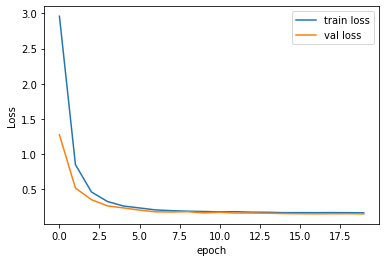

In [ ]:
plt.plot(mlp_history.history['loss'], label='train loss')
plt.plot(mlp_history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [ ]:
from sklearn import metrics
predicted = model_mlp.predict(X_test)
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

80/80 [==============================] - 0s 2ms/step
Root Mean Squared Error: 0.17539473886607299
R-squared : 0.10262832342190475


0.681083356083356
AUC: 0.6811


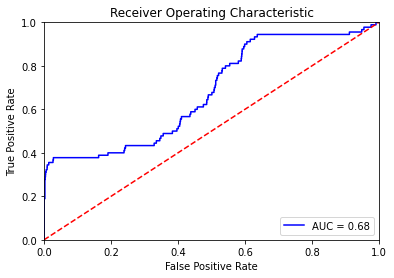

In [ ]:
#taken from net
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

pred= predicted

print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
predicted

array([[0.05092967],
       [0.02944477],
       [0.02104075],
       ...,
       [0.05493756],
       [0.06165545],
       [0.02842203]], dtype=float32)

CNN TRY# taken from internet

In [ ]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (5905, 7, 1)
Validation set shape (2532, 7, 1)


In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])
model_cnn.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             192       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 dense_14 (Dense)            (None, 3, 50)             3250      
                                                                 
 dense_15 (Dense)            (None, 3, 1)              51        
                                                                 
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
_________________________________________________________________


# **With dropout**

In [ ]:
model = Sequential()
model.add(Dense(750, kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu",input_shape=(7,)))
model.add(BatchNormalization())
model.add(Dense(512, kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(200,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(60,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(16,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 750)               6000      
                                                                 
 batch_normalization_1 (Batc  (None, 750)              3000      
 hNormalization)                                                 
                                                                 
 dense_17 (Dense)            (None, 512)               384512    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 200)               102600    
                                                                 
 dropout_6 (Dropout)         (None, 200)               0         
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])

In [ ]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=5)
history1 =model.fit(X_train, y_train, validation_split=0.35, shuffle=True, epochs=100,batch_size=2000,callbacks=[callback])

Epoch 1/100
2/2 [==============================] - 2s 358ms/step - loss: 120.6479 - auc: 0.5145 - val_loss: 114.0500 - val_auc: 0.3401
Epoch 2/100
2/2 [==============================] - 0s 35ms/step - loss: 112.2829 - auc: 0.4742 - val_loss: 106.1171 - val_auc: 0.3415
Epoch 3/100
2/2 [==============================] - 0s 34ms/step - loss: 104.3858 - auc: 0.5275 - val_loss: 98.5877 - val_auc: 0.3435
Epoch 4/100
2/2 [==============================] - 0s 32ms/step - loss: 96.9163 - auc: 0.5063 - val_loss: 91.4667 - val_auc: 0.3455
Epoch 5/100
2/2 [==============================] - 0s 34ms/step - loss: 89.8636 - auc: 0.5084 - val_loss: 84.7558 - val_auc: 0.3477
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 83.2361 - auc: 0.4735 - val_loss: 78.4509 - val_auc: 0.3514
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 77.0015 - auc: 0.4988 - val_loss: 72.5411 - val_auc: 0.3529
Epoch 8/100
2/2 [==============================] - 0s 33ms/step - loss

80/80 [==============================] - 0s 2ms/step
0.6475134225134225
AUC: 0.6475


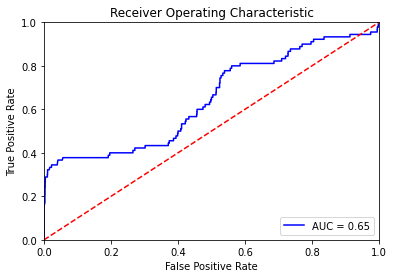

In [ ]:
#taken from net
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

pred= model.predict(X_test)

print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
df_predict=eq_data_last_days_out
df_predict.shape
preds=model.predict(df_predict[req])

7/7 [==============================] - 0s 2ms/step


In [ ]:
live_set = df_predict[['time', 'place', 'latitude', 'longitude']]
live_set.loc[:,'quake'] = preds
live_set

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,time,place,latitude,longitude,quake
7841,2022-12-22,California,40.364027,-119.718784,0.134859
7842,2022-12-22,California,40.364027,-119.718784,0.134702
7843,2022-12-23,California,40.364027,-119.718784,0.134464
7844,2022-12-23,California,40.364027,-119.718784,0.134475
7845,2022-12-23,California,40.364027,-119.718784,0.134669
...,...,...,...,...,...
7673,2022-12-23,Washington,47.111054,-121.851426,0.143308
7674,2022-12-23,Washington,47.111054,-121.851426,0.143457
7675,2022-12-23,Washington,47.111054,-121.851426,0.144722
7676,2022-12-24,Washington,47.111054,-121.851426,0.144966


In [ ]:
#grouping it
live_set = live_set.groupby(['time', 'place'], as_index=False).mean()
live_set


,time,place,latitude,longitude,quake
0,2022-12-09,Philippines,10.354810,124.543933,0.168611
1,2022-12-11,Montana,44.762553,-110.913086,0.137232
2,2022-12-11,Philippines,10.354810,124.543933,0.168521
3,2022-12-12,Montana,44.762553,-110.913086,0.137188
4,2022-12-12,Wyoming,44.715605,-110.728600,0.134719
...,...,...,...,...,...
105,2022-12-27,Indonesia,-4.318863,120.748293,0.168615
106,2022-12-27,Japan,34.994066,137.508375,0.168611
107,2022-12-27,Nevada,37.980819,-117.597709,0.136697
108,2022-12-27,New Mexico,31.810489,-104.413491,0.135040


In [ ]:
# increment date to include DAYS_OUT_TO_PREDICT
live_set['time']= pd.to_datetime(live_set['time'],format='%Y-%m-%d') 
live_set['time'] = live_set['time'] + pd.to_timedelta(9,unit='d')

live_set

,time,place,latitude,longitude,quake
0,2022-12-18,Philippines,10.354810,124.543933,0.168611
1,2022-12-20,Montana,44.762553,-110.913086,0.137232
2,2022-12-20,Philippines,10.354810,124.543933,0.168521
3,2022-12-21,Montana,44.762553,-110.913086,0.137188
4,2022-12-21,Wyoming,44.715605,-110.728600,0.134719
...,...,...,...,...,...
105,2023-01-05,Indonesia,-4.318863,120.748293,0.168615
106,2023-01-05,Japan,34.994066,137.508375,0.168611
107,2023-01-05,Nevada,37.980819,-117.597709,0.136697
108,2023-01-05,New Mexico,31.810489,-104.413491,0.135040


In [ ]:
import datetime as dt
# giving out predictions from today
days = list(set([d for d in live_set['time'].astype(str) if d > dt.datetime.today().strftime('%Y-%m-%d')]))
days.sort()

# Predict NaN outcome value in earthquake for next day 1.
predict_day=days[1]
predict_day
z=pd.DataFrame (days, columns = ['time'])
z
z['time']= pd.to_datetime(z['time'],format='%Y-%m-%d') 

In [ ]:
answer=pd.merge(left=live_set, right=z, how='inner', on=['time'])
answer

,time,place,latitude,longitude,quake
0,2022-12-28,Chile,-28.093655,-70.560722,0.168615
1,2022-12-28,New Mexico,31.810489,-104.413491,0.135289
2,2022-12-28,Oregon,43.970311,-122.321800,0.134044
3,2022-12-28,Philippines,10.354810,124.543933,0.163898
4,2022-12-28,Texas,31.577576,-103.562881,0.135777
...,...,...,...,...,...
80,2023-01-05,Indonesia,-4.318863,120.748293,0.168615
81,2023-01-05,Japan,34.994066,137.508375,0.168611
82,2023-01-05,Nevada,37.980819,-117.597709,0.136697
83,2023-01-05,New Mexico,31.810489,-104.413491,0.135040


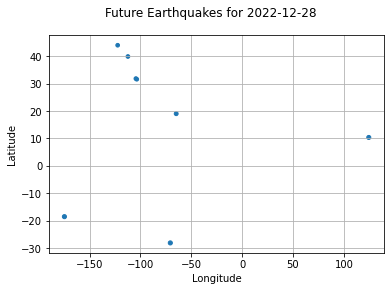

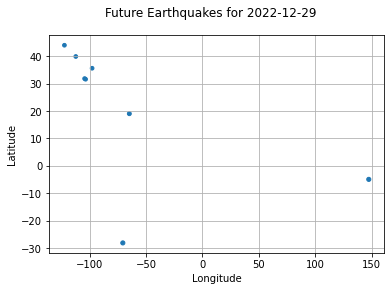

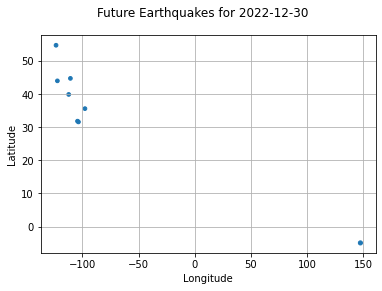

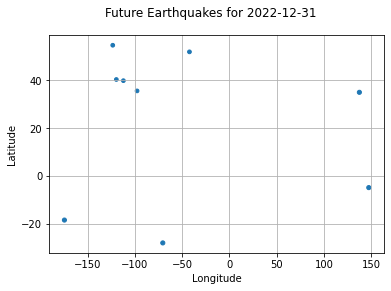

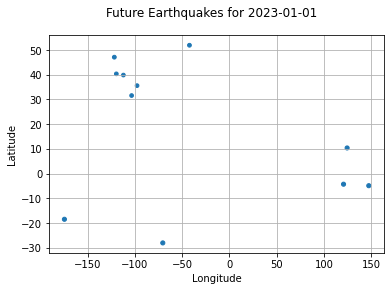

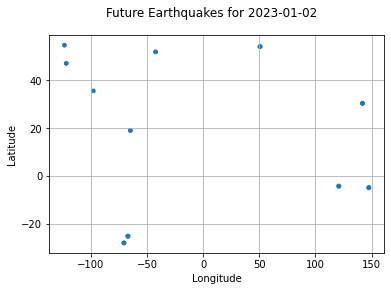

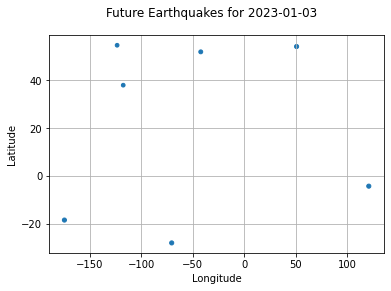

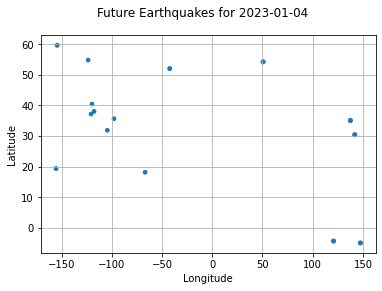

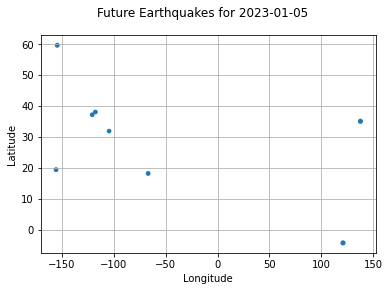

In [ ]:
#internet
for i in range(0,9):
    live_set_tmp = live_set[live_set['time'] == days[i]]
    plt.scatter(live_set_tmp['longitude'], live_set_tmp['latitude'], s=(live_set_tmp['quake'] * 100))
    plt.suptitle('Future Earthquakes for ' + days[i])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
from folium import Choropleth
from folium.plugins import HeatMap


#internet
#Reference for plot https://python-visualization.github.io/folium/quickstart.html & https://www.kaggle.com/code/cwthompson/volcano-making-a-map-of-volcanoes-using-folium/notebook

for i in range(0,9):
    live_set_tmp = live_set[live_set['time'] == days[i]]
    volcano_map = folium.Map()
    for i in range(0, live_set_tmp.shape[0]):
      volcano = live_set_tmp.iloc[i]
      folium.Marker([volcano['latitude'], volcano['longitude']], popup=volcano['place']).add_to(volcano_map)
    display(volcano_map)




